# Pokemon **

### Step 1. Importa las librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2. Activa matplotlib de forma estática

In [2]:
%matplotlib inline

### Step 3. Lee 'pokemon.csv' de esta [url](https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv), lee la primera columna del csv como índice del DataFrame

In [5]:
pokemon = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')
df = pokemon.copy()

### Step 4. Mira las primeras filas del dataset para hacerte una idea de los datos cargados

In [6]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Step 5. Haz un scatter plot con `lmplot()`, que es el método que pinta una regresión lineal
Pasa el DataFrame como argumento del método en el parámetro llamado `data`

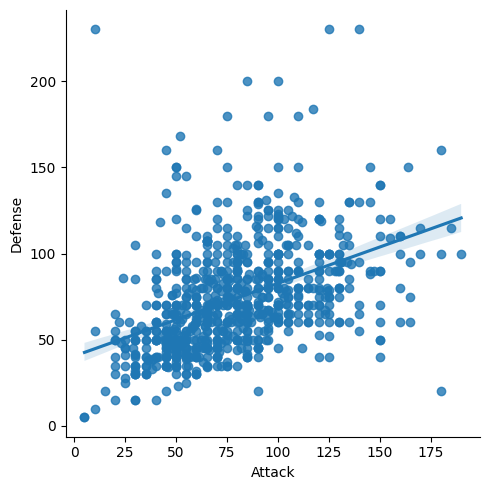

In [7]:
sns.lmplot(x='Attack', y='Defense', data=df)
plt.show();

### Step 6. No queremos ver la línea recta de la regresión lineal.
Prueba a añadir fit_reg a falso

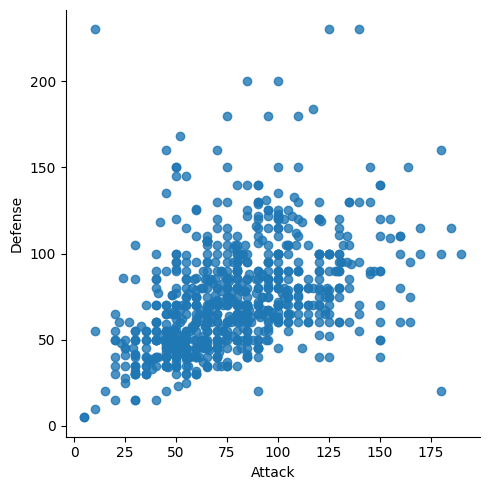

In [8]:
sns.lmplot(x='Attack', y='Defense', data=df,fit_reg=False)
plt.show();

### Step 7. Vamos a decir qué variable (columna del DataFrame) codifica los colores (hue)
Que el `hue` sea el Stage

In [9]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [10]:
df = df.set_index('#')

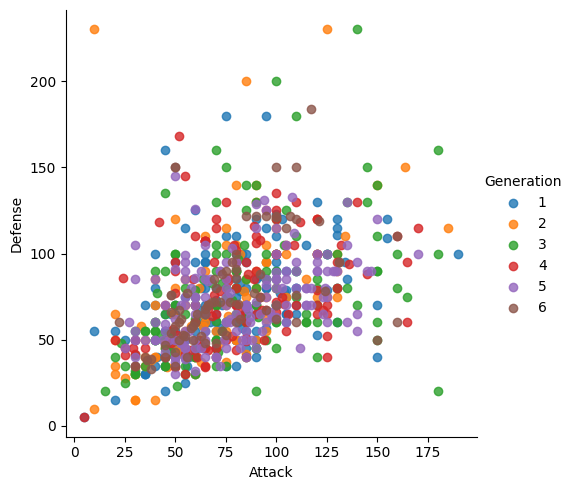

In [11]:
sns.lmplot(x='Attack',
            y='Defense', 
            data=df,
            fit_reg=False,
            hue='Generation')
plt.show();

### Step 8. Limita el eje x entre 20 y 100

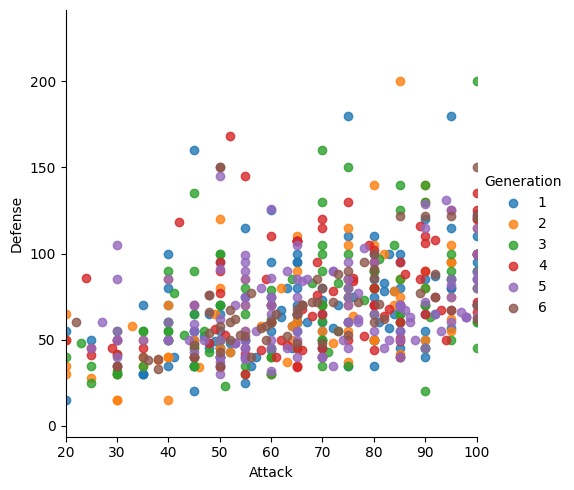

In [12]:
sns.lmplot(x='Attack',
            y='Defense', 
            data=df,
            fit_reg=False,
            hue='Generation')

plt.xlim(20,100)
plt.show();

### Step 9. Dibuja un diagrama de cajas con el dataframe

<Axes: >

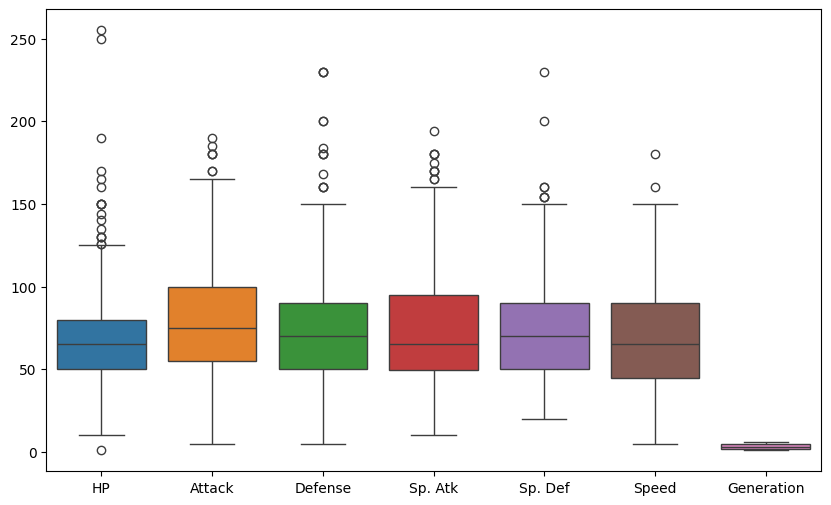

In [21]:
numerica =  df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.boxplot(numerica)

### Step 10. No nos interesan las columnas Total, Stage ni Legendary
Bórralos del DataFrame y vuelve a dibujar el diagrama de cajas

In [25]:
df = df.drop(columns=['Total','Legendary'])

KeyError: "['Total', 'Legendary'] not found in axis"

<Axes: >

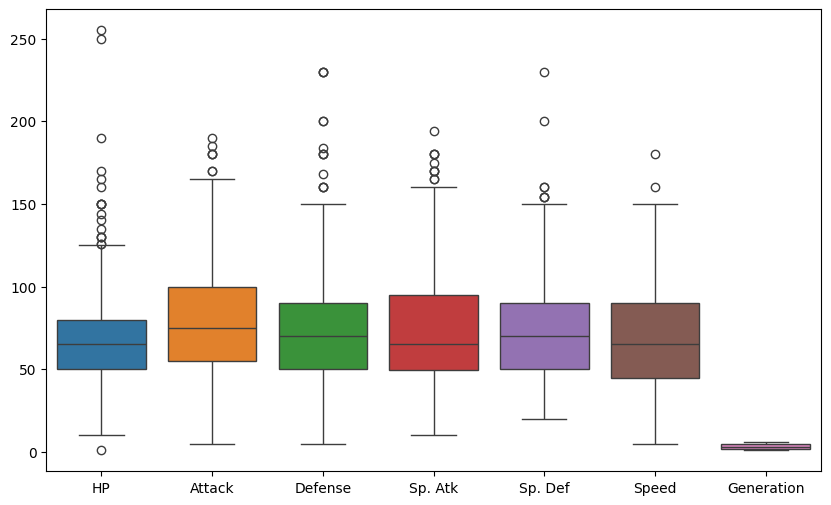

In [23]:
numerica =  df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.boxplot(numerica)

### Step 11. Mira cuántos 'Type 1' diferentes hay en el DataFrame

In [26]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

### Step 12. Quédate del Dataframe solo con los 'Type 1' iguales a 'Grass', 'Fire' o 'Water'

In [27]:
type1 = df[(df['Type 1'] == 'Grass') |( df['Type 1'] == 'Fire')| (df['Type 1'] == 'Water')]

### Step 13. Usa un estilo 'whitegrid'

In [28]:
sns.set_style("whitegrid")

### Step 14. Pinta diagramas de violín con el DataFrame

<Axes: xlabel='Type 1', ylabel='Attack'>

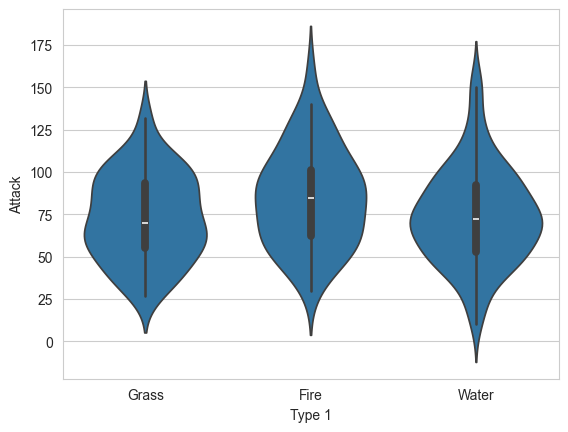

In [29]:
sns.violinplot(x='Type 1', y='Attack', data=type1)

### Step 15. Escribe una lista de colores con valores '#78C850', '#F08030',  '#6890F0'

In [30]:
colores = ['#78C850', '#F08030',  '#6890F0']

### Step 16. Pinta de nuevo los diagramas de violín añadiendo esos colores en la paleta (palette)

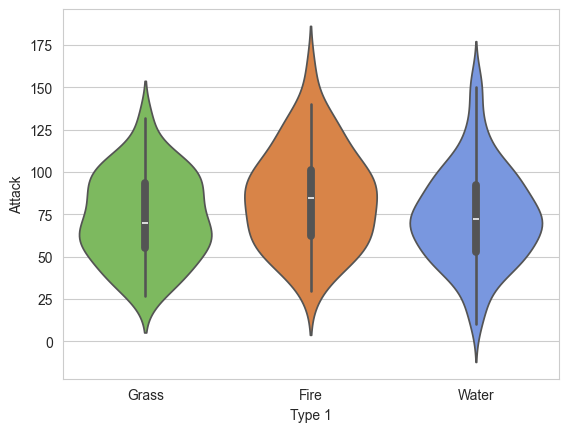

In [31]:
sns.violinplot(x='Type 1', y='Attack', data=type1,hue='Type 1',palette=colores);

### Step 17. Con el diagrama de violín vemos la forma de la distribución, pero no sabemos si Grass tiene muchos puntos y Fire tiene muy pocos.
- Para ver esto, usamos el swarmplot.
- Pinta el último diagrama de violines pero con un swarmplot en lugar de un violin

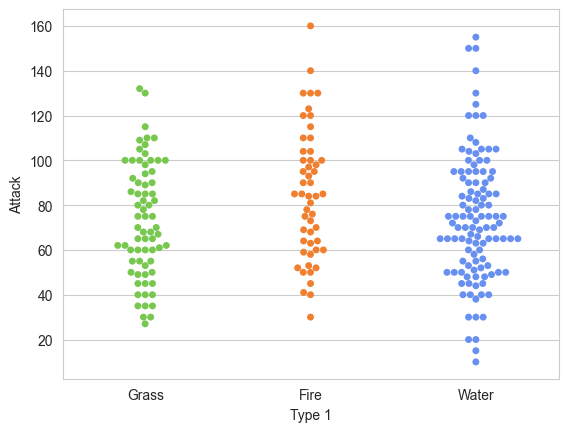

In [32]:
sns.swarmplot(x='Type 1', y='Attack', data=type1,hue='Type 1',palette=colores);

### Step 18. Queremos ver los violines a la vez que los swarm, los podemos pintar juntos. 
Elimina los diagramas de caja dentro de los violines con el parámetro inner = None y pon una transparencia de 0.9

C:\Users\anoni\AppData\Local\Temp\ipykernel_23120\1625736195.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


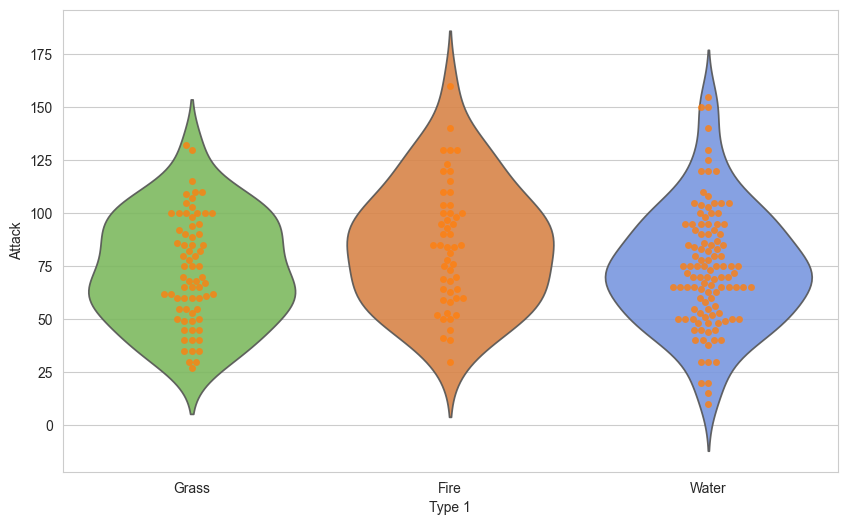

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='Type 1', 
    y='Attack', 
    data=type1,
    palette=colores, 
    inner=None,
    alpha=0.9
)

sns.swarmplot(
    x='Type 1', 
    y='Attack', 
    data=type1,
    alpha=0.8
)
plt.show();

### Step 19. Veamos la función melt() de pandas. Melt toma los valores de varias columnas y los junta todos en una misma columna nueva.
 Dado un DataFrame, [melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) recibe varios parámetros:
 * qué columnas del DataFrame se quedan igual
 * qué nombres de columnas del dataframe pasan a ser una columna nueva
 * cómo queremos llamar esas nuevas columnas

Primero recuerda el Dataframe `df_grass_fire_water` con las primeras 5 filas

In [35]:
type1

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
#,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1
4,Charmander,Fire,NaN,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...,...,...
672,Skiddo,Grass,NaN,66,65,48,62,57,52,6
673,Gogoat,Grass,NaN,123,100,62,97,81,68,6
692,Clauncher,Water,NaN,50,53,62,58,63,44,6


### Step 20. Queremos dejar igual las variables 'Name' y 'Type 1'
Queremos añadir una columa nueva cuyos valores sean las columnas que queremos apilar y que se llame 'New Column'
    
Escribimos `df_grass_fire_water.melt(id_vars=['Name', 'Type 1'], value_vars=[...], var_name='New Column')`

In [36]:
df_melted = pd.melt(
    df, 
    id_vars=['Name', 'Type 1'],
    var_name='Nueva columna',
    value_name='Valor'
)

In [37]:
df_melted

,Name,Type 1,Nueva columna,Valor
0,Bulbasaur,Grass,Type 2,Poison
1,Ivysaur,Grass,Type 2,Poison
2,Venusaur,Grass,Type 2,Poison
3,VenusaurMega Venusaur,Grass,Type 2,Poison
4,Charmander,Fire,Type 2,NaN
...,...,...,...,...
6395,Diancie,Rock,Generation,6
6396,DiancieMega Diancie,Rock,Generation,6
6397,HoopaHoopa Confined,Psychic,Generation,6
6398,HoopaHoopa Unbound,Psychic,Generation,6


### Step 21. Pintamos el swarmplot con el melted y entendemos la información

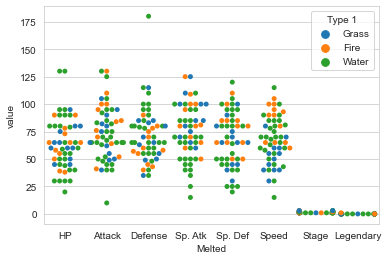

### Step 22. Basándote en el gráfico anterior, define el tamaño de la figura en (10,6) (usa plt)
En el swarmplot añade el argumento dodge a True y usa la anterior paleta de colores Pokemon

Dodge en inglés es "esquivar", ¿qué diferencia ves?

Usando plt: 
  - fija el límite del eje Y entre 0 y 200
  - fija la leyenda con bbox_to_anchor en upper left. Pista: upper left es el código 2 y se usa el parámetro loc.


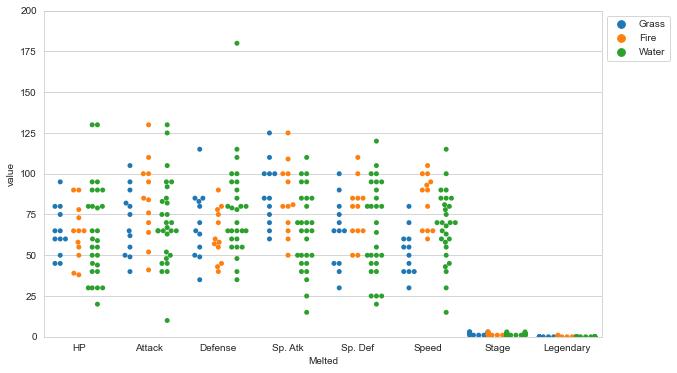

### Step 23. Mapas de calor
Calcula las correlaciones del primer DataFrame original df

Las correlaciones miden entre dos variables, si varío una, cuánto me varía la otra (cómo están de relacionadas)

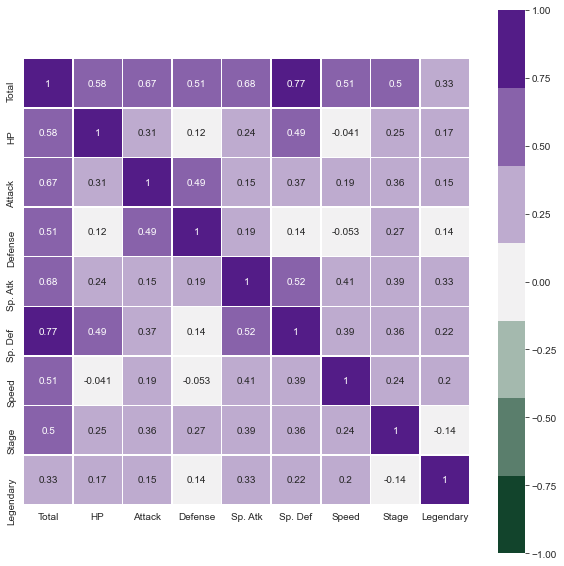

### Step 24. Pinta el histograma y la densidad de probabilidad del nivel de defensa usando el DataFrame original

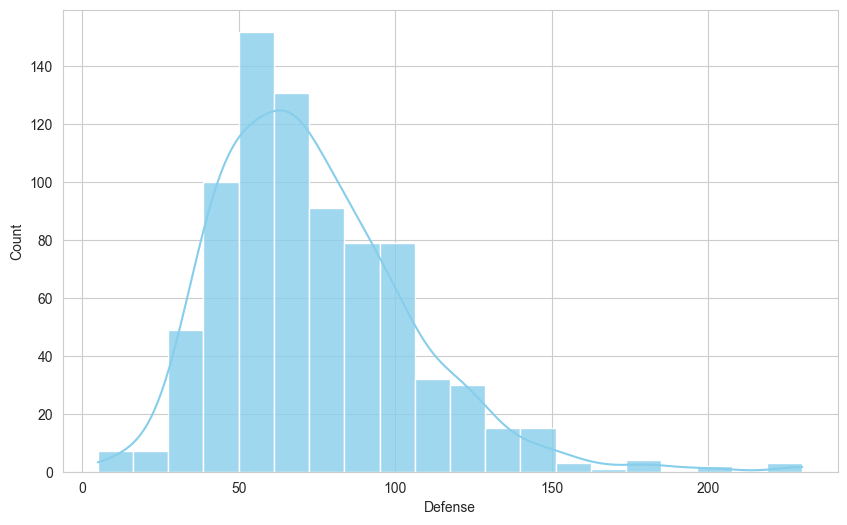

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(
    pokemon['Defense'], 
    kde=True,
    color='skyblue',
    bins=20, 
    alpha=0.8
);

### Step 25. Pinta un diagrama de barras de la columna 'Type 1' usando el DataFrame original
Usa un sns.countplot y plt.xticks para girar las etiquetas

C:\Users\anoni\AppData\Local\Temp\ipykernel_23120\3500310554.py:2: UserWarning: 
The palette list has fewer values (3) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x='Type 1',hue='Type 1',palette=colores)


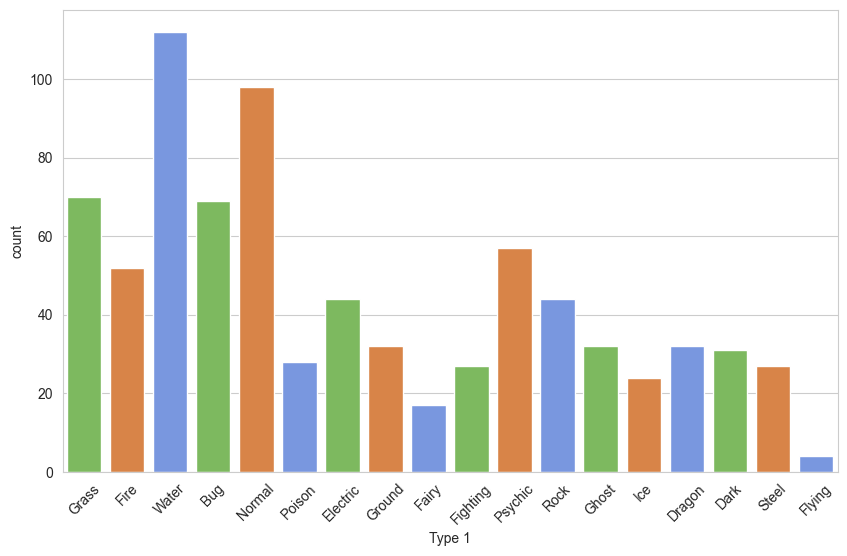

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type 1',hue='Type 1',palette=colores)
plt.xticks(rotation=45);

### Step 26. Usa catplot con el DataFrame original. 
Muestra el valor de Defense según el 'Type 1', muestra un subplot para legendarios y otro para no legendariosy divide los colores según el Type 2

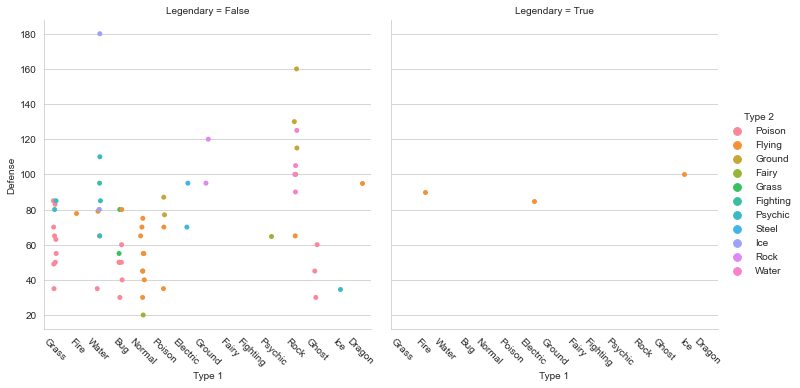

### Step 27. Muestra una función distribución de probabilidad con kdeplot (curvas de nivel) de la defensa respecto al ataque.


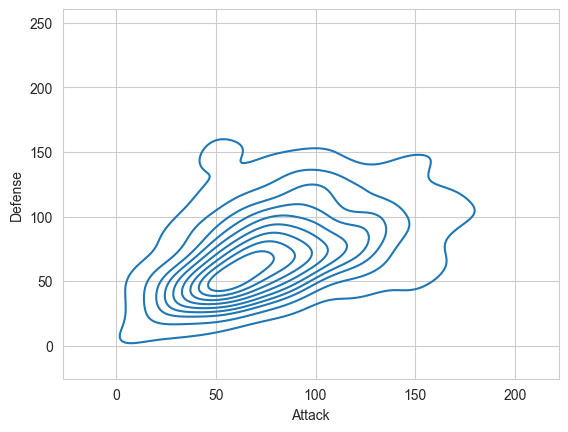

In [39]:
sns.kdeplot(x='Attack',y='Defense',data=pokemon);

### Step 29. Pinta una distribución de probabilidad conjunta, pintando la defensa respecto al ataque del DataFrame original

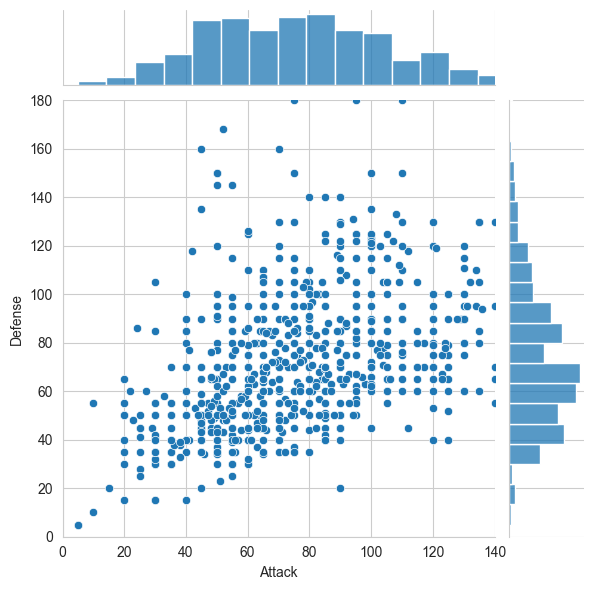

In [41]:
p = sns.jointplot(x="Attack", y="Defense", data=pokemon, kind="scatter")

p.ax_joint.set_xlim(0, 140)
p.ax_joint.set_ylim(0, 180)

p.ax_joint.set_xlabel('Attack')
p.ax_joint.set_ylabel('Defense')
plt.show()